In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
def f(x):#评估函数的工具函数
    if (x==np.zeros((1,4))).all():
        return 4
    elif (x==np.ones((1,4))).all():
        return 0
    else:
        return np.sum(x==np.ones((1,4)))
    
def evaluate(x):#评估适应度函数，输入为一个长度100的0,1序列
    total_r=0
    for i in range(25):
        r=f(x[i*4:(i+1)*4])
        total_r+=r
    return total_r

In [3]:
def inits(n):#初始化种群和种群适应度，n为种群大小
    v=[]
    s=np.random.randint(0,2,n*100)
    s=s.reshape((n,100))
    for i in range(n):
        v.append(evaluate(s[i]))
    v=np.array(v)
    return s,v

In [4]:
class GA:
    '''此类为遗传算法类，其中选择变异交叉等函数都直接在self.s上改动，无返回值'''
    def __init__(self,s0,v0,n,cp,mp):
        '''s0初始种群，v0初始种群适应度，n种群大小，cp交叉概率，mp变异概率'''
        self.s=s0
        self.v=v0
        self.n=n
        self.cp=cp
        self.mp=mp
        self.max=0
    
    def choose(self,mode=True,q=0.5):#选择
        '''mode为True是按比例的适应度分配，False是基于排序的适应度分配,q为当mode为False时第一位概率'''
        p=np.zeros(self.n)
        sum_p=np.sum(self.v)
        if mode:
            self.v=self.v/sum_p
        else:
            p1=q
            for _ in range(self.n):
                num=np.argmax(self.v)
                p[num]=p1
                self.v[num]=0
                p1=p1*(1-q)
            self.v=p
            self.v[np.argmin(self.v)]+=1-np.sum(self.v)
        #print(self.v)
        #此处self.v被临时变成选择概率，爱惜内存空间人人有责
        list_s=np.random.choice(self.n,self.n,p=self.v)
        s1=np.zeros((self.n,100))
        for i in range(self.n):
            s1[i]=self.s[list_s[i]].copy()
        self.s=s1
        return
        
    def cross(self):#交叉
        for i in range(int(self.n/2)):
            i1=i*2
            if random.random()>self.cp:
                continue
            else:
                num_c=np.random.randint(0,2,25)
                for j in range(25):
                    if num_c[j]==1:
                        tem=self.s[i1,j*4:(j+1)*4].copy()
                        self.s[i1,j*4:(j+1)*4]=self.s[i1+1,j*4:(j+1)*4].copy()
                        self.s[i1+1,j*4:(j+1)*4]=tem
        return
    
    def mutations(self):#变异
        for i in range(self.n):
            m=np.random.choice([0,1],100,p=np.array([1-self.mp,self.mp]))
            self.s[i]=np.abs(self.s[i]-m)
        return
    
    def train(self):#训练，返回全局最大值和它的上升过程数列
        r=[]
        n=0
        while self.max<95 and n<10:
            self.choose(False)
            self.cross()
            self.mutations()
            for i in range(self.n):
                self.v[i]=evaluate(self.s[i])
            self.max=max(self.max,np.max(self.v))
            r.append(self.max)
            n+=1
            
            #print(self.v)
        return self.max,r

In [5]:
s0,v0=inits(1000)
agent=GA(s0,v0,1000,0.9,0.01)
m,r=agent.train()

88.0


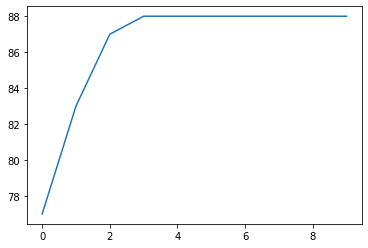

In [6]:
print(m)
fig, ax=plt.subplots(1, 1)
ax.clear()
ax.plot(r)
fig.canvas.draw()

In [9]:
agent.s[0]

array([1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1.])